In [1]:
import numpy as np
from PIL import Image
from PIL import ImageFilter

import matplotlib.pyplot as plt

%matplotlib inline

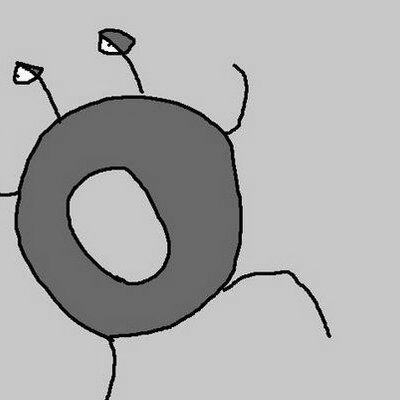

In [2]:
orig_img = Image.open("./kani.jpg").convert('L')
orig_img_arr = np.array(np.array(orig_img))
orig_img

In [3]:
n = 1
kernel_size = 2*n + 1
gauss_filter_arr = np.zeros((kernel_size,kernel_size))

In [4]:
gamma = 0.7
t = 1.0/np.sqrt(2*np.pi)*gamma

In [5]:
for i in range(-1*n,n+1):
    for j in range(-1*n,n+1):
        gauss_filter_arr[i+n,j+n] = t*np.exp(-1*(i**2+j**2)/(2*gamma**2))

In [6]:
sample_filter1 = np.array([[0,0,0],[0,1,0],[0,0,0]])
sample_filter2 = np.array([[1/2,1/2,1/2],[1/2,1/2,1/2],[1/2,1/2,1/2]])

In [7]:
def conv_filter(img,g_filter):
    out_img = img.copy()
    for x in range(0,out_img.shape[0]):
        for y in range(0,out_img.shape[1]):
            c = img[x,y]*g_filter[1,1]
            
            c1 = c2 = c3 = c4 = c5 = c6 = c7 = c8 = 0;

            #近傍座標の値を取得

            #1(対象としている点の左下)
            if x-1 > 0 and y+1 < img.shape[1]:
                c1 = img[x-1,y+1]*g_filter[2,0]

            #2(対象としている点の下)
            if y+1 < img.shape[1]:
                c2 = img[x,y+1]*g_filter[2,1]

            #3(対象としている点の右下)
            if x+1 < img.shape[0] and y+1 < img.shape[1]:
                c3 = img[x+1,y+1]*g_filter[2,2]

            #4(対象としている点の左隣)
            if x-1 > 0:
                c4 = img[x-1,y]*g_filter[1,0]

            #5(対象としている点の右隣)
            if x+1 < img.shape[0]:
                c5 = img[x+1,y]*g_filter[1,2]

            #6(対象としている点の左上)
            if x-1 > 0 and y-1 > 0:
                c6 = img[x-1,y-1]*g_filter[0,0]

            #7(対象としている点の上)
            if y-1 > 0:
                c7 = img[x,y-1]*g_filter[0,1]

            #8(対象としている点の右上)
            if x+1 < img.shape[0] and y-1 > 0:
                c8 = img[x+1,y-1]*g_filter[0,2]

            #畳み込み積分
            c = (c + c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8)

            out_img[x,y] = c

    return out_img

In [8]:
gauss_filter_arr.shape

(3, 3)

In [9]:
out_img = conv_filter(orig_img_arr,gauss_filter_arr)

In [10]:
out_pilImg = Image.fromarray(np.uint8(out_img))

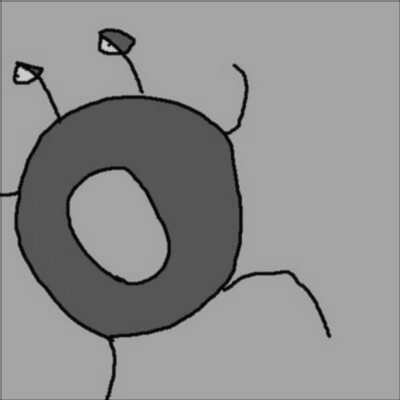

In [11]:
out_pilImg

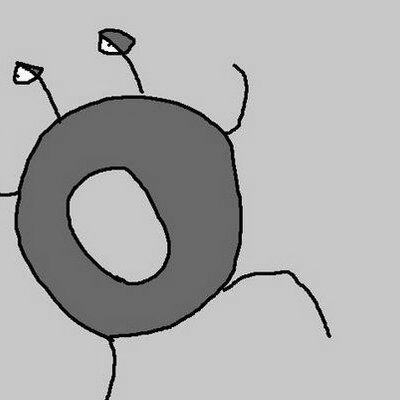

In [12]:
orig_img